# $$\textit{Bayes} \text{ (pronounced BAE$\cdot$z)}$$

$$\text{Schwartz}$$

# Bayes' Rule for Events

# $$p(B|A) = \frac{p(A|B)p(B)}{p(A)} = \frac{p(A,B)}{p(B)}$$

# Bayes' Formula for Random Variables
# $$p(Y|X) = \frac{p(X|Y)p(Y)}{p(X)} = \frac{p(X,Y)}{p(X)}$$



# Bayes' Theorem for Random Variables & Parameters (as Random Variables)
# $$p(\theta|X) = \frac{p(X|\theta)p(\theta)}{p(X)} = \frac{p(X,\theta)}{p(X)}$$

# Bayes' for Data Analysis

# $\begin{align}
p(\theta|X_1,X_2,\cdots,X_n) &= \frac{p(X_1,X_2,\cdots,X_n|\theta)p(\theta)}{p(X_1,X_2,\cdots,X_n)}\\{}\\ 
\text{Posterior} &= \frac{\text{Likelihood}\times\text{pior}}{\text{Marginal Likelihood}} 
\end{align}$

## _"The posterior is proportional to the likelihood times the prior"_
#### _(the marginal likelihood is just a normalizing constant)_

## $\begin{align}
\text{Posterior} &= \\
p(\theta|X_1,X_2,\cdots,X_n) &= \frac{p(X_1,X_2,\cdots,X_n|\theta)p(\theta)}{p(X_1,X_2,\cdots,X_n)}\\ 
&= \frac{p(X_1,X_2,\cdots,X_n|\theta)p(\theta)}{c} \propto  p(X_1,X_2,\cdots,X_n|\theta)p(\theta)\\
& \hspace{11.5em} \text{Likelihood } \times \text{prior}
\end{align}$



<img src="bayes.png" width="750px" align="left">

# Contrasting Frequentist and Bayesian Analysis


## $\begin{align}
\underset{\theta}{argmax}\; p(X_1,X_2,\cdots,X_n|\theta) &= \underset{\theta}{argmax}\; \; p(X_1|\theta)p(X_2|\theta)\cdots p(X_n|\theta) \quad\;\;\;\;\;\;\textbf{(1)}\\{}\\
\quad\quad p(\theta|X_1,X_2,\cdots,X_n) &\propto \quad\quad\quad\; p(X_1|\theta)p(X_2|\theta)\cdots p(X_n|\theta)p(\theta) \quad\textbf{ (2)}\\{}\\
\underset{\theta}{argmax}\; p(\theta|X_1,X_2,\cdots,X_n) &= \underset{\theta}{argmax}\;\; p(X_1|\theta)p(X_2|\theta)\cdots p(X_n|\theta)p(\theta) \quad\textbf{ (3)}
\end{align}$

### (1) Classical Frequentist Maximum Likelihood Estimation (MLE)
### (2) Full Bayesian Posterior Analysis 
### (3) Maximum $a\;posteriori$ (MAP) Estimate

In [ ]:













x_1 = 4
x_2 = 14

# prior
p_theta_1 = .2
p_theta_11 = .3
p_theta_21 = .5

# $$p(X_i|\theta) = \frac{\theta^{x_i} e^{-\theta}}{x_i!}$$

# $$
\begin{align}
p(\theta=1|x_1=4,x_2=14) &\propto ?\\ % \frac{1^{4} e^{-1}}{4!}\frac{1^{14} e^{-1}}{14!} \times .2 \\
p(\theta=11|x_1=4,x_2=14) &\propto ?\\ % \frac{11^{4} e^{-11}}{4!}\frac{11^{14} e^{-11}}{14!} \times .3 \\
p(\theta=21|x_1=4,x_2=14) &\propto ?\\ % \frac{21^{4} e^{-21}}{4!}\frac{21^{14} e^{-21}}{14!} \times .5 \\
\end{align}
$$

In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def loglikelihood(sample, model, pars):
    log_likelihood = 0
    for x in sample:
        log_likelihood = log_likelihood + np.log(getattr(stats,model).pmf(x,**pars))
    return log_likelihood

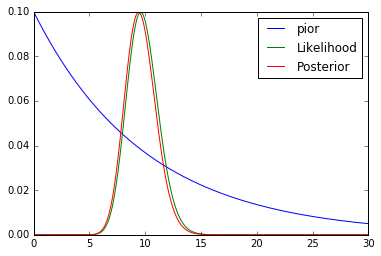

In [28]:
sample = [11,2,14,5,16]
model = "poisson"
pars = {'mu': np.linspace(0, 30, 1000)[1:]}          

prior_model = "expon"
prior_pars = {"scale": 10}        

prior = getattr(stats,prior_model).pdf(pars['mu'], **prior_pars)
scaling = max(prior)

plt.plot(pars['mu'], prior)

likelihood = np.exp(loglikelihood(sample, model, pars))
likelihood = likelihood/max(likelihood) * scaling

plt.plot(pars['mu'], likelihood)

posterior = np.exp(loglikelihood(sample, model, pars)) * getattr(stats, prior_model).pdf(pars['mu'], **prior_pars)
posterior = posterior / max(posterior) * scaling

plt.plot(pars['mu'], posterior)

plt.legend(["pior", "Likelihood", "Posterior"], loc="best")

# Poisson-Exponential posterior is Gamma
#### (This is becuase the exponential distribution is "conjugate" to the poisson distribution)

$\begin{array}
Pp(\theta|X_1,X_2,\cdots,X_n) &\propto \lambda e^{-\lambda \theta} \prod_{i=1}^{n}\frac{\theta^{x_i} e^{-\theta}}{x_i!}\\
&\propto \theta^{^{\sum_{i=1}^{n}x_i}} e^{-(n+\lambda)\theta}\\
&\propto Gamma\left(1+\sum_{i=1}^{n}x_i, n+\lambda\right)
\end{array}$

##### And you can do whatever you want with it

<img src="bayes.png" width="750px" align="left">

# Why be Bayes?

- Note that Bayesians have $p(\theta|X_1,X_2,\cdots,X_n)$ 
- a probability distribution over parameter $\theta$ conditional on observable data (_"theta given data"_)
- and can therefore make probabilistic statements about $\theta$
- e.g., the **probability** that $\theta$ is greater than some null hypothesis $H_0: \theta = \theta_0$

# What else do Bayesians have?
- A prior where they can put subjective _"prior belief"_ into an analysis
- An easily intreptable and coherent system for "_updating belief"_ after seeing data

# What do Frequentists have?
- test statistics and critical values for rejecting null hypothesis $H_0$
    - p-values to measure evidence against the null hypothesis $H_0$
    - $H_0$ doesn't have probabilities for being right
    - p-values aren't the probability that the null is true
- confidence intervals to give plausible ranges for parameters 
- a lot of envy

# How is this similar to bootstrapping?

### Suppose you have posterior distributions for $\theta_1$ and $\theta_2$: how can you say which is larger?

# What is a prior?

# What is a posterior?

In [ ]:
























# conda install graphviz
# pip install graphviz

from graphviz import Digraph

g = Digraph()

#g.node('here', label='YOU ARE\nHERE.', shape='box', style='dashed')


g.node('start', shape="box", style="rounded")
g.node('noob', label="Pretty new to statistics\nor don't remember much?", shape='diamond')
g.node('practice', label="Just need a refresher to pass \nstats interview questions?", shape='diamond')
g.node('regressionML', label="Need a refresher to pass \nregression/ML interview questions?", shape='diamond')
g.node('apply', label="!!! Schedule Stats Interview !!!", shape='diamond')



g.node('stat101', label='https://www.udacity.com/course/intro-to-statistics--st101\nhttps://www.khanacademy.org/math/statistics-probability/probability-library\nhttps://www.khanacademy.org/math/statistics-probability/random-variables-stats-library', shape='parallelogram')
g.node('stat201', label='http://www.intmath.com/counting-probability/counting-probability-intro.php', shape='parallelogram')
g.node('ML', label='https://www.r-bloggers.com/in-depth-introduction-to-machine-learning-in-15-hours-of-expert-videos/\nChapters 1-4 http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Sixth%20Printing.pdf', shape='parallelogram')




g.edge('start', 'noob')
g.edge('noob', 'practice', label='no')
g.edge('practice', 'regressionML', label='no')
g.edge('regressionML', 'apply', label='no')

g.edge('noob', 'stat101', label='yes')
g.edge('practice', 'stat201', label='yes')
g.edge('regressionML', 'ML', label='yes')


g